In [1]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

In [16]:
IDs = ['METACPHS_S106', 'METACPHS_S107', 'METACPHS_S108', 'METACPHS_S109', 'METACPHS_S110', 'METACPHS_S111', 'METACPHS_S112', 'METACPHS_S113', 'METACPHS_S114', 'METACPHS_S115', 'METACPHS_S116', 'METACPHS_S117', 'METACPHS_S118', 'METACPHS_S119']

In [19]:
# PerFedAvg 1/12/24
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\01-12_15-10_Seq_PerAvg_LinRegr1000"
h5_file_name = r"PerAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    print(list(f.keys()))
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    print()
    print(group)
    rs_train_loss_GROUP = f['rs_train_loss']
    seqperavg1000_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    seqperavg1000_test_loss = rs_test_loss_GROUP[()]
    seqperavg1000_client_testing_logs = f['client_testing_logs']
    S106_arr = (np.array(seqperavg1000_client_testing_logs[IDs[0]]))


['client_testing_logs', 'cost_func_tuples_by_client', 'curr_live_rs_test_loss', 'gradient_norm_lists_by_client', 'prev_live_rs_test_loss', 'rs_test_loss', 'rs_train_loss', 'unseen_live_rs_test_loss']

<HDF5 group "/client_testing_logs" (14 members)>


In [20]:
S106_arr

array([1.86571479e-03, 1.48072315e-03, 1.28159090e-03, ...,
       2.82491874e-05, 2.81901757e-05, 2.81313096e-05])

In [21]:
S106_arr.shape

(1001,)

In [22]:
S106_arr[-10:]

array([2.86666755e-05, 2.86065615e-05, 2.85466058e-05, 2.84868065e-05,
       2.84271700e-05, 2.83676854e-05, 2.83083591e-05, 2.82491874e-05,
       2.81901757e-05, 2.81313096e-05])

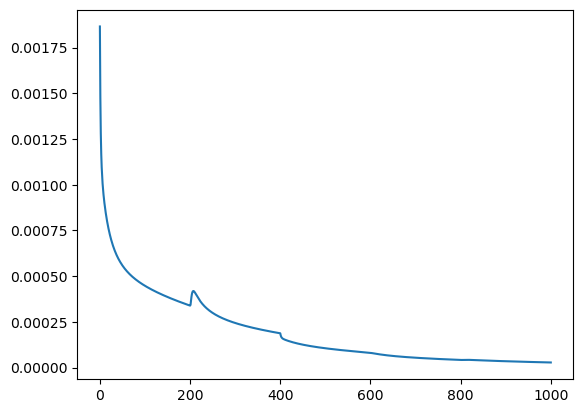

In [23]:
plt.plot(S106_arr)

1. In what function does client_testing_log get written to?
    1. client_base.test_metrics(), directly after shared_loss_calc, saves the averaged version
    2. It uses self.model in the client file, therefore this is the "local" personalized model
1. How does it get combined and saved by the server?
2. So where does the global model get trained/tested? Does it get either/both? Where is this called out? In FedAvg files or?
    1. Maybe this is why the global model instabilities disappeared... have I only been visualizing the local model performance?


In [ ]:
plt.plot(range(len(Blocal100_train_loss)), Blocal100_train_loss, label='B: Local')
plt.plot(range(len(Bfedavg100_train_loss)), Bfedavg100_train_loss, label='B: FedAvg')
plt.plot(range(len(Bapfl100_train_loss)), Bapfl100_train_loss, label='B: APFL')
plt.title("rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

In [ ]:

# FEDVG
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-14_FedAvg100_BS601"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    Bfedavg100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    Bfedavg100_test_loss = rs_test_loss_GROUP[()]
    
# APFL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-24_APFL100_BS601"
h5_file_name = r"cphs_APFL_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    Bapfl100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    Bapfl100_test_loss = rs_test_loss_GROUP[()]
######################################################   

plt.plot(range(len(Blocal100_train_loss)), Blocal100_train_loss, label='B: Local')
plt.plot(range(len(Bfedavg100_train_loss)), Bfedavg100_train_loss, label='B: FedAvg')
plt.plot(range(len(Bapfl100_train_loss)), Bapfl100_train_loss, label='B: APFL')
plt.title("rs_train_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

plt.plot(range(len(Blocal100_train_loss)), Blocal100_train_loss, label='B: Local')
plt.plot(range(len(Bfedavg100_train_loss)), Bfedavg100_train_loss, label='B: FedAvg')
plt.plot(range(len(Bapfl100_train_loss)), Bapfl100_train_loss, label='B: APFL')
plt.title("rs_test_loss (averaged over all clients)")
plt.xlabel("Training Round")
plt.ylabel("Test Loss")
plt.legend()
plt.show()

In [5]:
# FEDVG
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-14_FedAvg100_BS601"
h5_file_name = r"cphs_FedAvg_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    print(f"f.keys(): {f.keys()}")
    print(f"a_group_key: {list(f.keys())[0]}")
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    Bfedavg100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    Bfedavg100_test_loss = rs_test_loss_GROUP[()]

f.keys(): <KeysViewHDF5 ['cost_func_tuples_by_client', 'gradient_norm_lists_by_client', 'rs_test_loss', 'rs_train_loss']>
a_group_key: cost_func_tuples_by_client


In [6]:
# APFL
h5_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\08-14_22-24_APFL100_BS601"
h5_file_name = r"cphs_APFL_test.h5"
with h5py.File(os.path.join(h5_path, h5_file_name), 'r') as f:
    a_group_key = list(f.keys())[0]
    print(f"f.keys(): {f.keys()}")
    print(f"a_group_key: {list(f.keys())[0]}")
    client_list = list(f[a_group_key])
    group = f[a_group_key]
    rs_train_loss_GROUP = f['rs_train_loss']
    Bapfl100_train_loss = rs_train_loss_GROUP[()]
    rs_test_loss_GROUP = f['rs_test_loss']
    Bapfl100_test_loss = rs_test_loss_GROUP[()]

f.keys(): <KeysViewHDF5 ['rs_test_loss', 'rs_train_loss']>
a_group_key: rs_test_loss
